# Image Data Augmentation with Keras

In this project, we'll create a comprehensive data augmentation pipeline using TensorFlow Keras to enhance the diversity of the CIFAR-10 dataset. The pipeline includes various transformations such as rotation, shifts, shear, zoom, flips, rescaling, and preprocessing for the MobileNetV2 model. We'll then train a simple convolutional neural network (CNN) model on the augmented data to classify images into 10 categories. The model's architecture consists of convolutional layers, max-pooling layers, a flattening layer, and dense layers with ReLU and softmax activations. We'll compile the model using the Adam optimizer and train it for 10 epochs, monitoring the training and validation accuracy to assess the model's performance. Finally, we'll evaluate the model on the test set and visualize the training history to understand the effects of data augmentation on model generalization and performance.

![Horizontal Flip](assets/horizontal_flip.jpg)

## Import Libraries

In [19]:
import os
import numpy as np
import tensorflow as tf

from PIL import Image
from matplotlib import pyplot as plt

print('Using TensorFlow', tf.__version__)

Using TensorFlow 2.16.1


## Plot batch of images

The below function plot 9 images side by side with the original one on the center

In [20]:
def plot_augmented_images(original_image, generator, title):
    # Set up the plot with 3 rows and 3 columns
    fig, axes = plt.subplots(3, 3, figsize=(12, 12))

    # Set the title of the figure
    fig.suptitle(title,
                 fontsize='large',
                 fontweight='bold',
                 style='italic',
                 family='monospace')

    # Plot the original image in the center
    axes[1, 1].imshow(original_image.astype('uint8'))
    axes[1, 1].set_title("Original Image")
    axes[1, 1].axis('off')

    # Iterate over the axes to plot the augmented images
    for i, ax in enumerate(axes.flatten()):
        if i != 4:  # Skip the center plot
            # Get the next augmented image from the generator
            x, y = next(generator.flow_from_directory('images', batch_size=1))
            # Plot the image on the current axis
            ax.imshow(x[0].astype('uint8'))
            # Add title with augmentation parameters (example: rotation, shear, etc.)
            # You can customize this based on your augmentation settings
            ax.set_title(f"Augmented Image {i+1}")
            # Remove the axis ticks
            ax.axis('off')

    # Adjust the spacing between the plots
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to make room for the title
    # Display the plot
    plt.show()



## Image Augmentation with Keras: Rotation

In deep learning for computer vision, image augmentation is a common technique used to enhance the diversity of the training dataset. This is achieved by applying various transformations to the original images, which helps the model generalize better and reduces the risk of overfitting.

### Rotation Augmentation

One popular augmentation technique is rotation. The `rotation_range` parameter in Keras' `ImageDataGenerator` class allows for random rotations of images within a specified range of degrees. For instance, setting `rotation_range` to 120 means that the images can be randomly rotated by any angle between -120 and 120 degrees.

### Application

In the example provided, the `ImageDataGenerator` is configured to perform rotation augmentation with a range of 120 degrees. The generator is then used to create augmented versions of the original image, which are visualized alongside the original image for comparison.

### Conclusion

Rotation augmentation is a simple yet effective way to introduce variability in the training data, making the model more robust to changes in orientation and ultimately improving its performance.

Found 1 images belonging to 1 classes.
Found 1 images belonging to 1 classes.
Found 1 images belonging to 1 classes.
Found 1 images belonging to 1 classes.
Found 1 images belonging to 1 classes.
Found 1 images belonging to 1 classes.
Found 1 images belonging to 1 classes.
Found 1 images belonging to 1 classes.


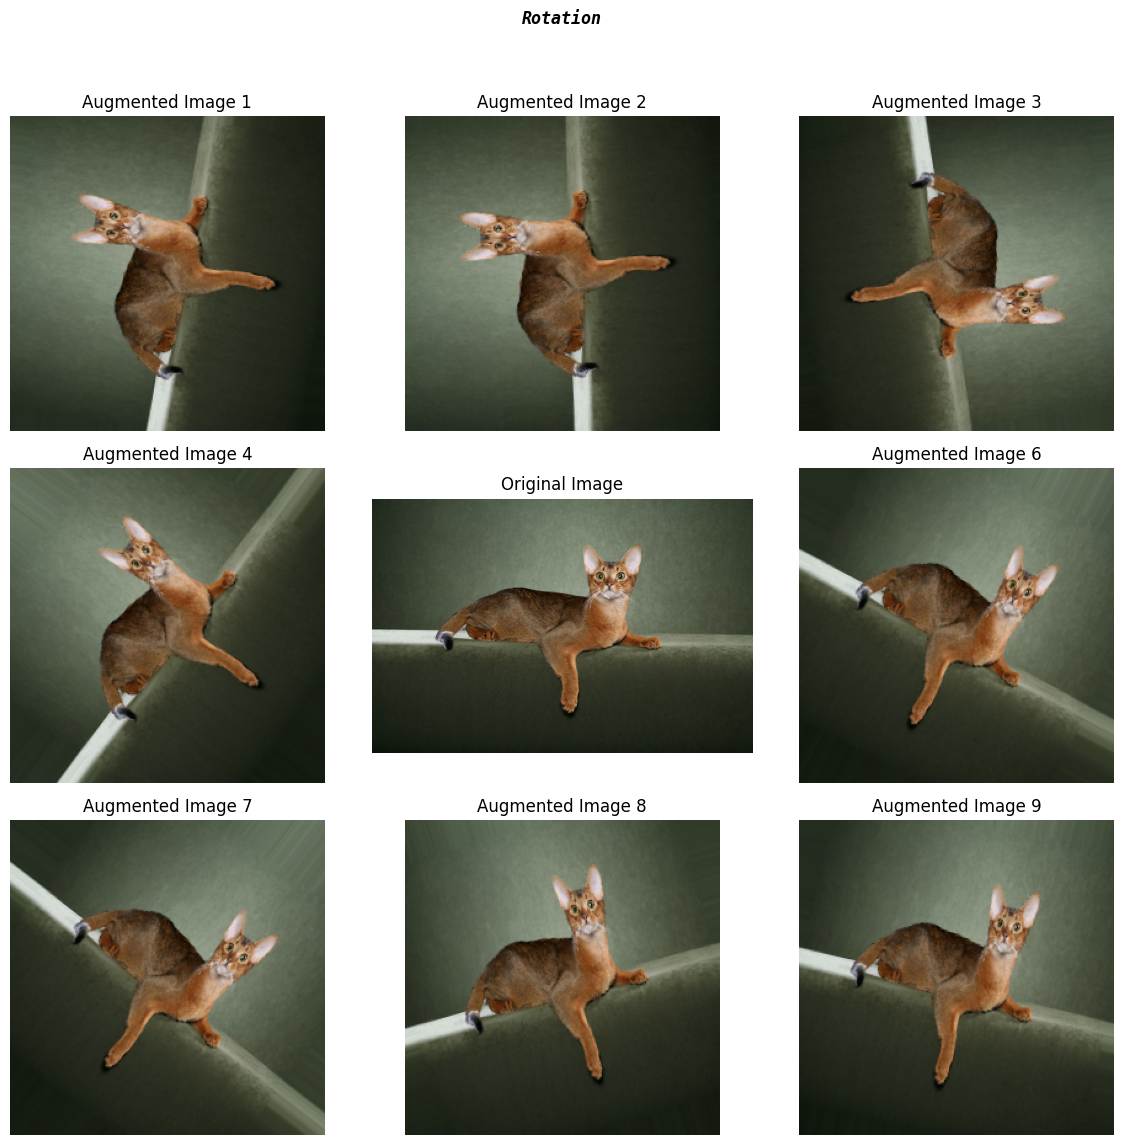

In [21]:
image_path = 'images/train/cat/cat.jpg'
original_image = plt.imread(image_path)

generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range = 120
)

plot_augmented_images(original_image, generator, 'Rotation')

## Image Augmentation with Keras: Width and Height Shifts

In addition to rotation, another common image augmentation technique involves shifting the image either horizontally (width shift) or vertically (height shift). This can help the model learn to recognize objects in different positions within the image frame.

### Width and Height Shift Augmentation

The `width_shift_range` and `height_shift_range` parameters in Keras' `ImageDataGenerator` class allow for random horizontal and vertical shifts of images, respectively. These parameters can be set to a float representing a fraction of the total width or height, or a list of pixel values specifying the exact shifts to be applied.

### Application

In the example, the `ImageDataGenerator` is configured with specific pixel values for both width and height shifts. The generator then creates augmented versions of the original image with these shifts applied. The augmented images are visualized alongside the original image to illustrate the effect of the shifts.

### Conclusion

Width and height shift augmentations are useful for training models to be invariant to the position of objects within the image. By exposing the model to images with objects in various positions, it can learn to recognize patterns more effectively, leading to improved performance.

Found 1 images belonging to 1 classes.
Found 1 images belonging to 1 classes.
Found 1 images belonging to 1 classes.
Found 1 images belonging to 1 classes.
Found 1 images belonging to 1 classes.
Found 1 images belonging to 1 classes.
Found 1 images belonging to 1 classes.
Found 1 images belonging to 1 classes.


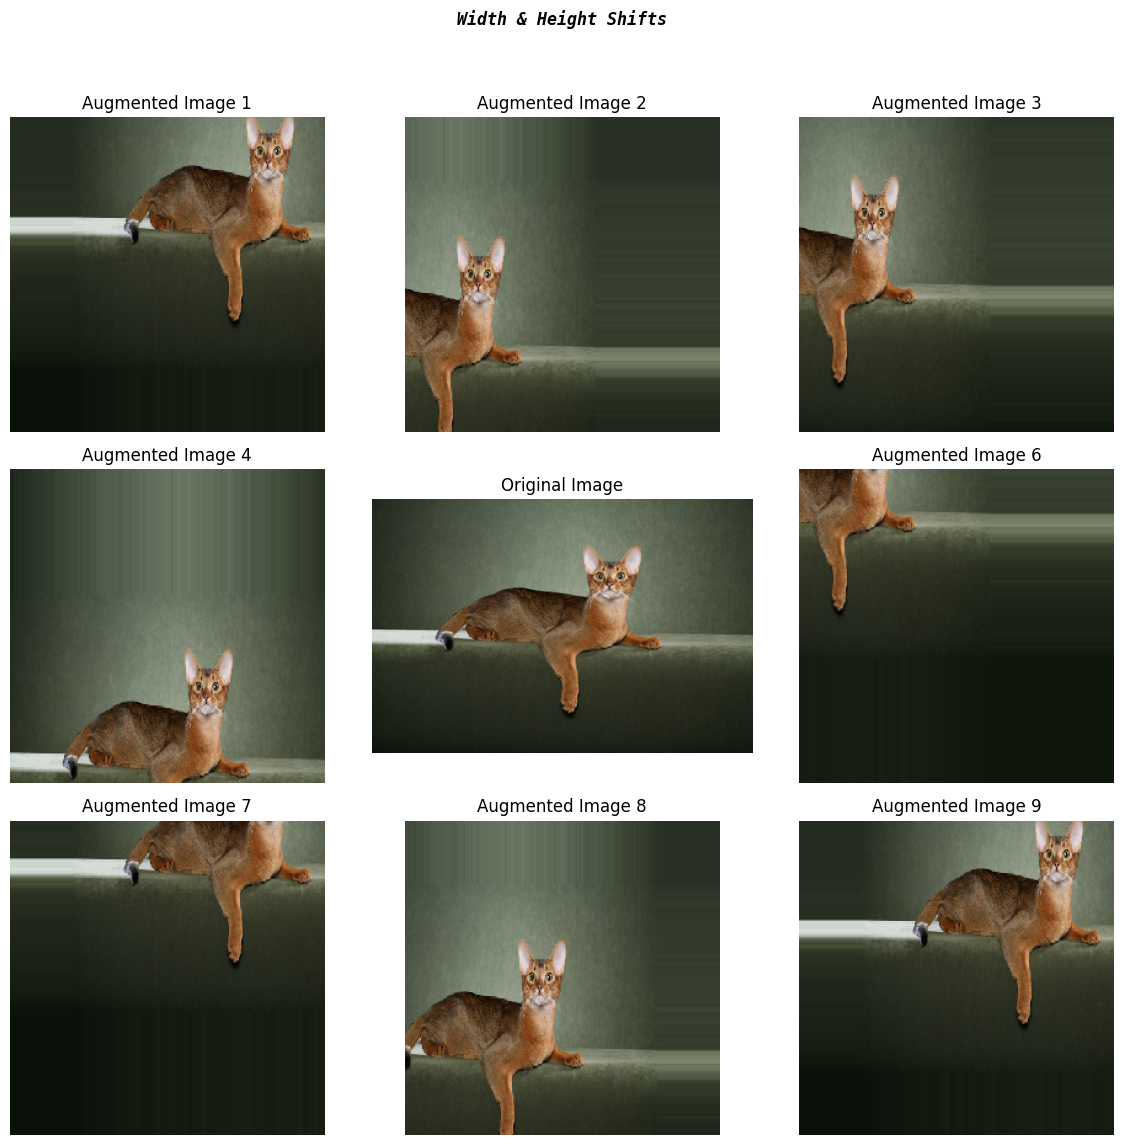

In [22]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    width_shift_range = [-100, -50, 0, 50, 100],
    height_shift_range = [-100, -50, 0, 50, 100]
)
plot_augmented_images(original_image, generator, 'Width & Height Shifts')

## Image Augmentation with Keras: Brightness Adjustment

Brightness adjustment is a valuable image augmentation technique that alters the brightness of images. This can help a model learn to recognize objects under varying lighting conditions.

### Brightness Augmentation

The `brightness_range` parameter in Keras' `ImageDataGenerator` class enables random brightness adjustments within a specified range. The range is defined as a tuple of two floats, where the first value is the lower brightness limit and the second value is the upper brightness limit. For example, `brightness_range=(0.5, 2.0)` allows the brightness of the images to be adjusted to anywhere between 50% (darker) and 200% (brighter) of the original image.

### Application

In the provided example, the `ImageDataGenerator` is configured with a brightness range of (0.5, 2.0). The generator then creates augmented versions of the original image with different brightness levels. These augmented images are visualized alongside the original image to demonstrate the effect of the brightness adjustments.

### Conclusion

Brightness augmentation is a simple yet effective way to enhance the robustness of a model by training it with images that have varying levels of illumination. This can be particularly useful for applications where the model needs to perform well under different lighting conditions.

Found 1 images belonging to 1 classes.
Found 1 images belonging to 1 classes.
Found 1 images belonging to 1 classes.
Found 1 images belonging to 1 classes.
Found 1 images belonging to 1 classes.
Found 1 images belonging to 1 classes.
Found 1 images belonging to 1 classes.
Found 1 images belonging to 1 classes.


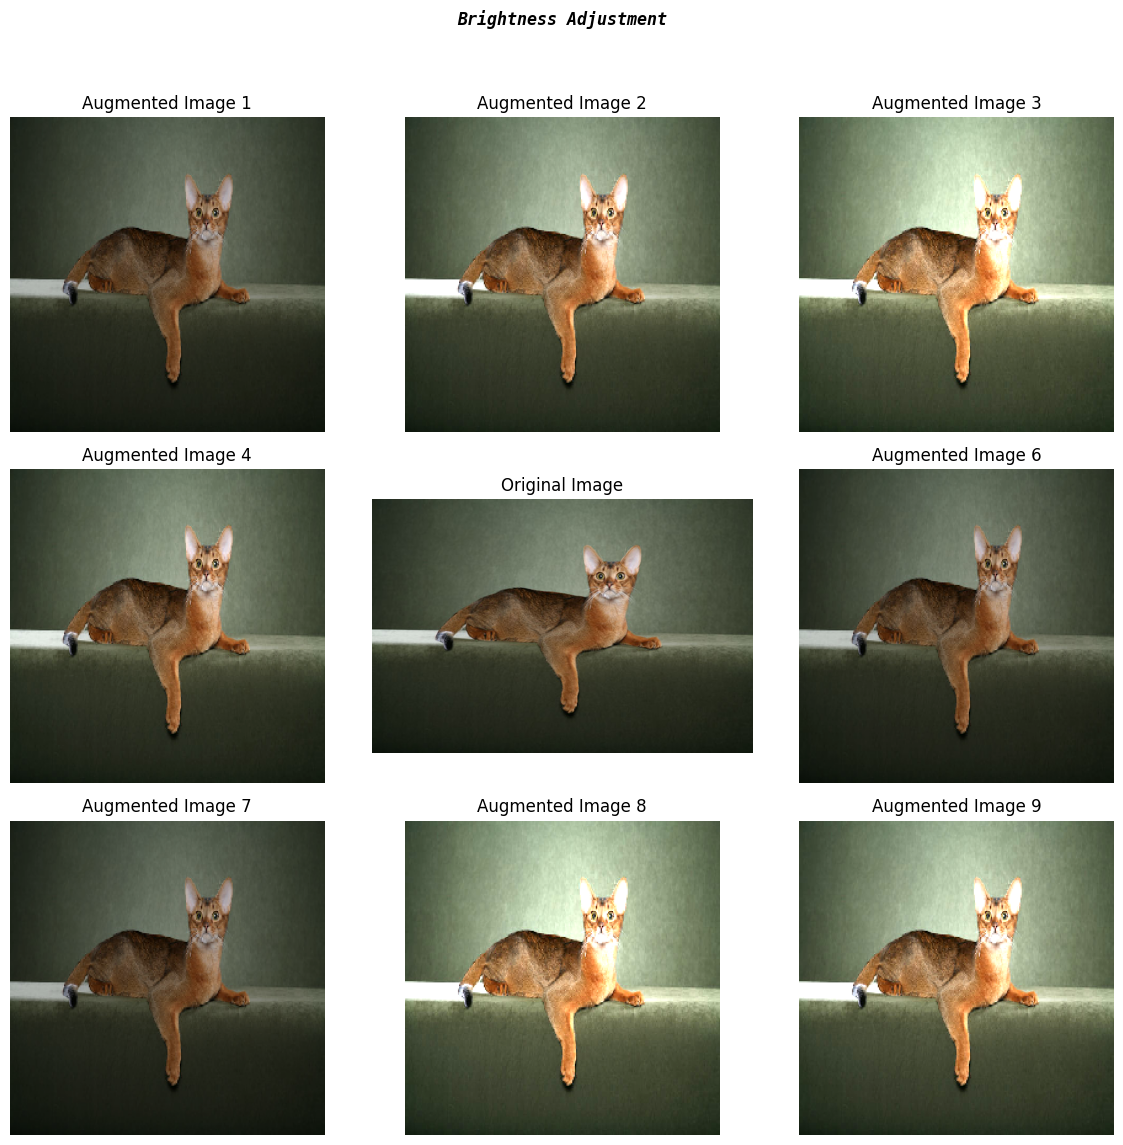

In [23]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    # Your code here
    brightness_range = (0.5, 2.)
)

plot_augmented_images(original_image, generator, "Brightness Adjustment")

## Image Augmentation with Keras: Shear Transformation

Shear transformation is an image augmentation technique that slants the shape of the image, simulating a sort of "wind effect." This can help models learn to recognize objects in images that are slightly distorted due to perspective shifts.

### Shear Transformation Augmentation

The `shear_range` parameter in Keras' `ImageDataGenerator` class specifies the shear intensity in degrees. For example, `shear_range=40` means that the images can be randomly sheared by an angle of up to 40 degrees.

### Application

In the provided example, the `ImageDataGenerator` is configured with a shear range of 40 degrees. The generator then creates augmented versions of the original image with this shear transformation applied. These augmented images are visualized alongside the original image to showcase the effect of the shear transformation.

### Conclusion

Shear transformation augmentation is useful for training models to be invariant to changes in the geometry of objects within the image. By exposing the model to images with objects that are slightly distorted, it can learn to recognize patterns more effectively, improving its performance in real-world scenarios.

Found 1 images belonging to 1 classes.
Found 1 images belonging to 1 classes.
Found 1 images belonging to 1 classes.
Found 1 images belonging to 1 classes.
Found 1 images belonging to 1 classes.
Found 1 images belonging to 1 classes.
Found 1 images belonging to 1 classes.
Found 1 images belonging to 1 classes.


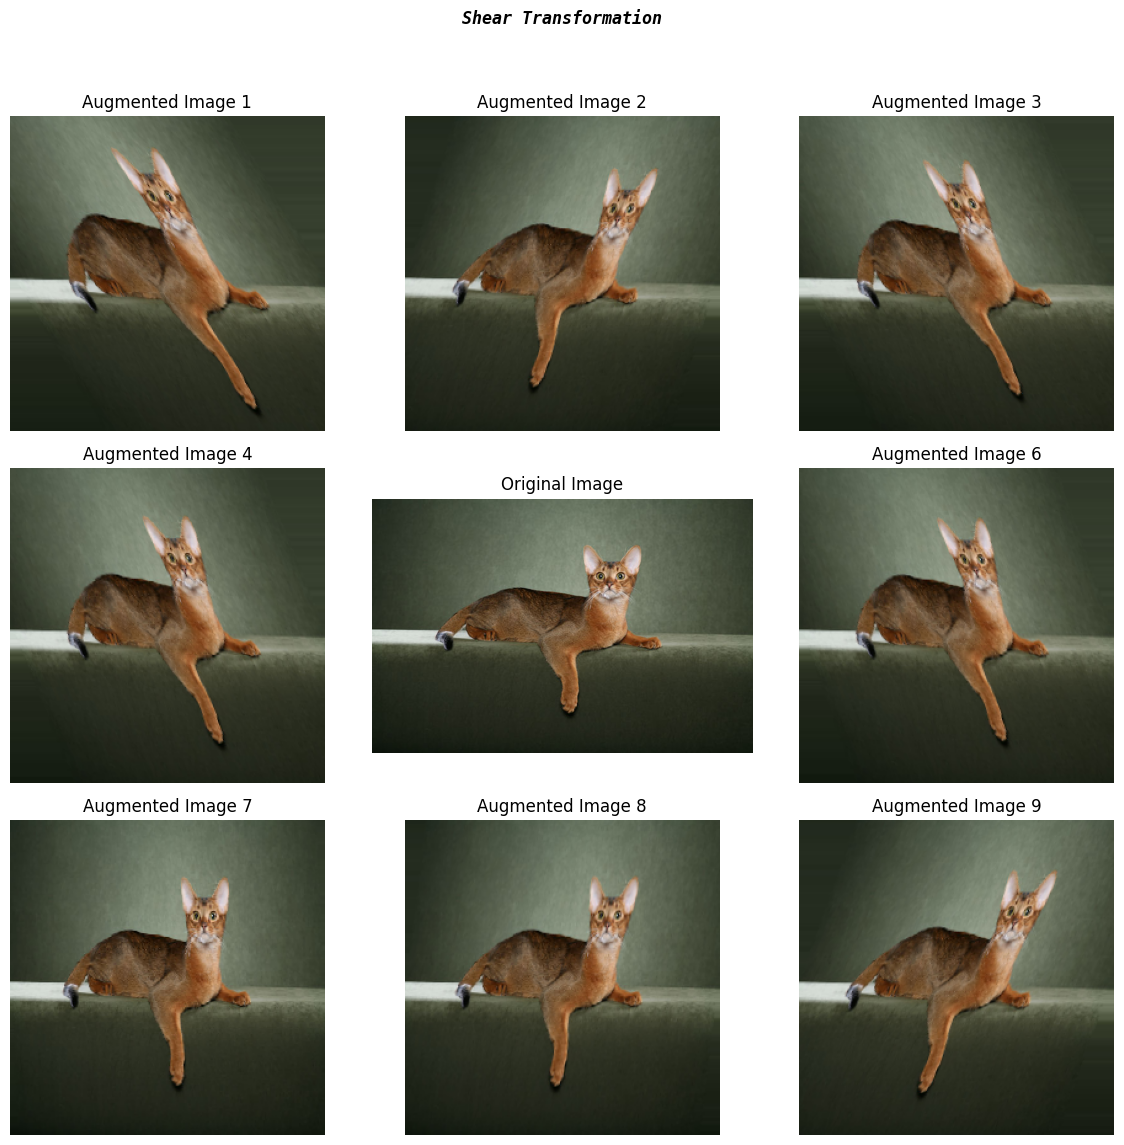

In [24]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    # Your code here
    shear_range = 40,
)

plot_augmented_images(original_image, generator, "Shear Transformation")

## Image Augmentation with Keras: Zoom

Zoom is an image augmentation technique that involves scaling the image either inwards or outwards, simulating zooming effects. This can help models learn to recognize objects at different scales.

### Zoom Augmentation

The `zoom_range` parameter in Keras' `ImageDataGenerator` class specifies the range for random zoom. It can be a single float or a list of two floats. A single float will zoom in and out by the same factor, while a list `[lower, upper]` will zoom in and out by random factors between `lower` and `upper`. For example, `zoom_range=[0.5, 1.5]` means that the images can be randomly zoomed in or out by a factor between 0.5 (zoom out) and 1.5 (zoom in).

### Application

In the provided example, the `ImageDataGenerator` is configured with a zoom range of [0.5, 1.5]. The generator then creates augmented versions of the original image with different levels of zoom applied. These augmented images are visualized alongside the original image to demonstrate the effect of the zoom augmentation.

### Conclusion

Zoom augmentation is useful for training models to be invariant to the scale of objects within the image. By exposing the model to images with objects at various sizes, it can learn to recognize patterns more effectively, leading to improved performance in scenarios where the object scale may vary.

Found 1 images belonging to 1 classes.
Found 1 images belonging to 1 classes.
Found 1 images belonging to 1 classes.
Found 1 images belonging to 1 classes.
Found 1 images belonging to 1 classes.
Found 1 images belonging to 1 classes.
Found 1 images belonging to 1 classes.
Found 1 images belonging to 1 classes.


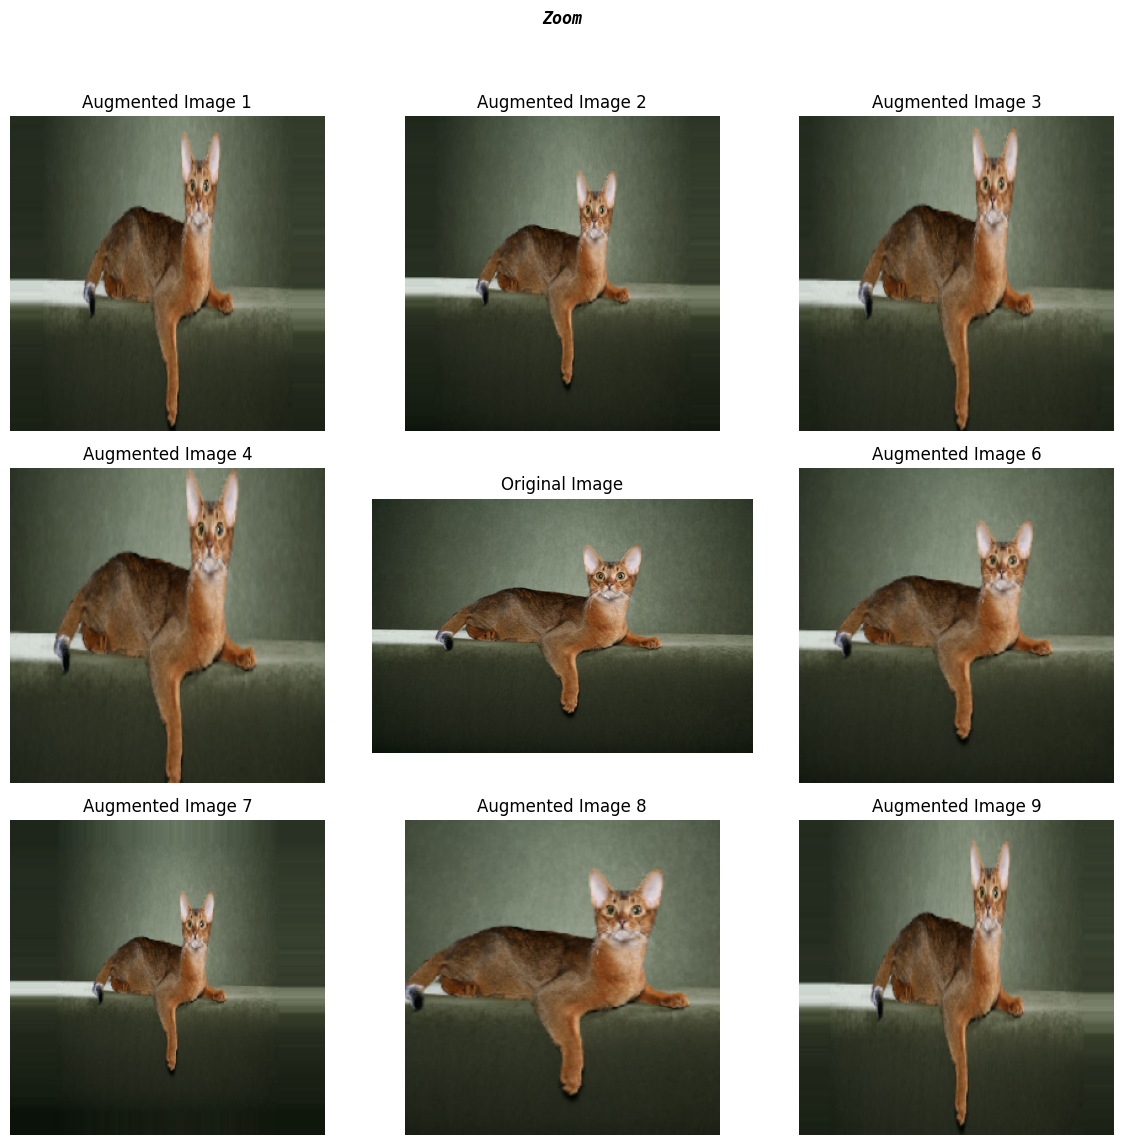

In [25]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    # Your code here
    zoom_range=[0.5, 1.5]
)

plot_augmented_images(original_image, generator, "Zoom")

## Image Augmentation with Keras: Channel Shift

Channel shift is an image augmentation technique that involves randomly changing the color channels of the image. This can help models learn to recognize objects regardless of color variations.

### Channel Shift Augmentation

The `channel_shift_range` parameter in Keras' `ImageDataGenerator` class specifies the range for random channel shifts. For example, `channel_shift_range=100` means that the values of each color channel can be randomly shifted up or down by up to 100 units.

### Application

In the provided example, the `ImageDataGenerator` is configured with a channel shift range of 100. The generator then creates augmented versions of the original image with different levels of channel shift applied. These augmented images are visualized alongside the original image to demonstrate the effect of the channel shift augmentation.

### Conclusion

Channel shift augmentation is useful for training models to be invariant to color variations in the image. By exposing the model to images with different color shifts, it can learn to recognize patterns more effectively, improving its performance in scenarios where the color of objects may vary.

Found 1 images belonging to 1 classes.
Found 1 images belonging to 1 classes.
Found 1 images belonging to 1 classes.


Found 1 images belonging to 1 classes.
Found 1 images belonging to 1 classes.
Found 1 images belonging to 1 classes.
Found 1 images belonging to 1 classes.
Found 1 images belonging to 1 classes.


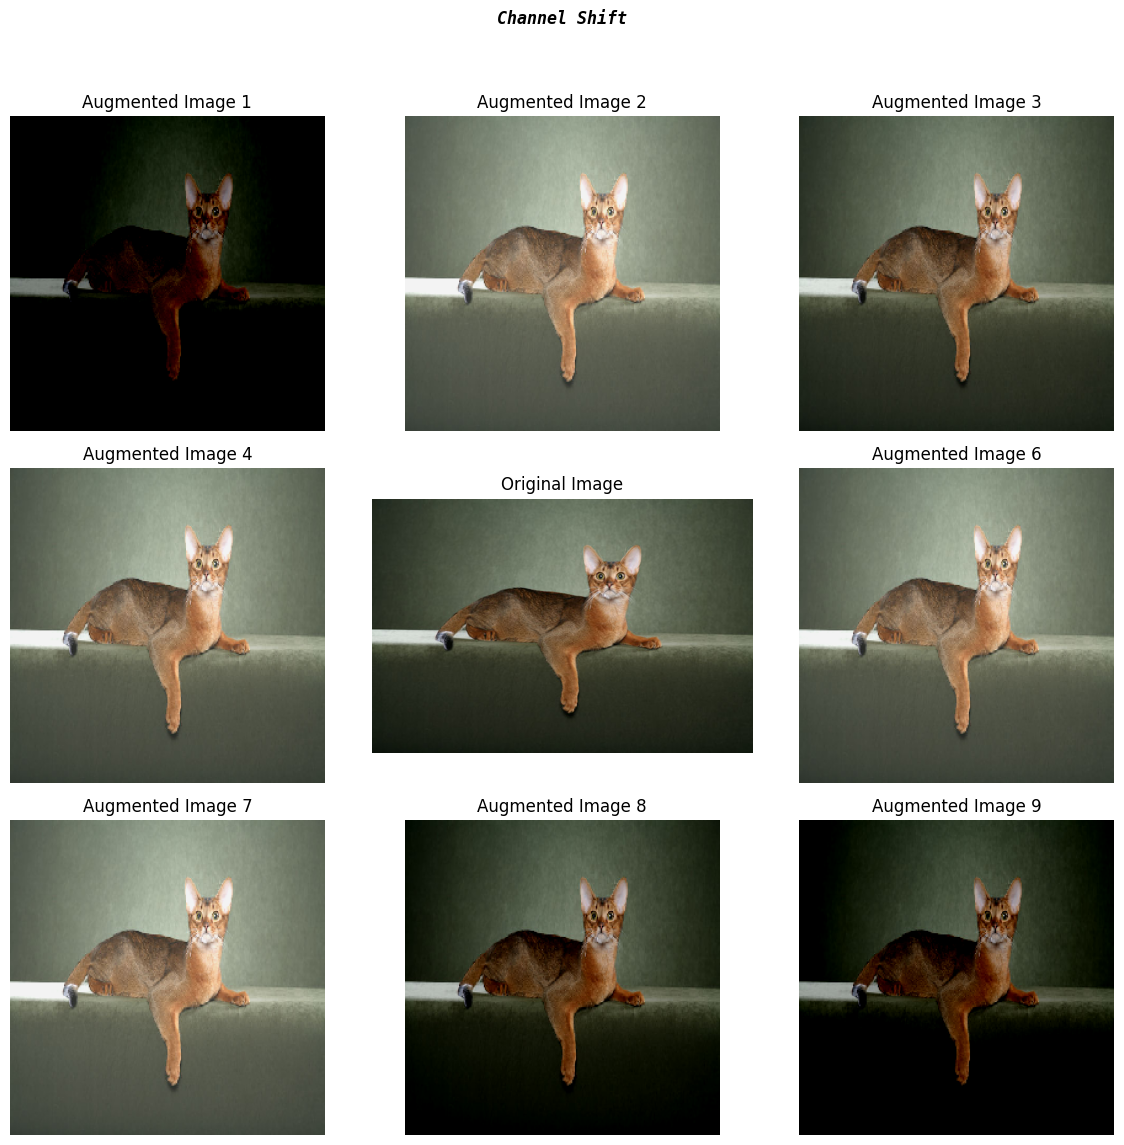

In [26]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    # Your code here
    channel_shift_range=100
)

plot_augmented_images(original_image, generator, "Channel Shift")

## Image Augmentation with Keras: Flips

Flipping is a simple yet effective image augmentation technique that mirrors the image either horizontally or vertically. This can help models learn to recognize objects in images regardless of their orientation.

### Flip Augmentation

The `horizontal_flip` and `vertical_flip` parameters in Keras' `ImageDataGenerator` class allow for random horizontal and vertical flips of images, respectively. Setting `horizontal_flip=True` enables the generator to randomly flip images horizontally, while `vertical_flip=True` allows for random vertical flipping.

### Application

In the provided example, the `ImageDataGenerator` is configured with both horizontal and vertical flip augmentations enabled. The generator then creates augmented versions of the original image with these flip transformations applied. These augmented images are visualized alongside the original image to illustrate the effect of the flip augmentations.

### Conclusion

Flip augmentation is a straightforward way to increase the diversity of the training data, making the model more robust to variations in object orientation. By exposing the model to images with different flip orientations, it can learn to recognize patterns more effectively, improving its performance in real-world scenarios where the orientation of objects may vary.

Found 1 images belonging to 1 classes.


Found 1 images belonging to 1 classes.
Found 1 images belonging to 1 classes.
Found 1 images belonging to 1 classes.
Found 1 images belonging to 1 classes.
Found 1 images belonging to 1 classes.
Found 1 images belonging to 1 classes.
Found 1 images belonging to 1 classes.


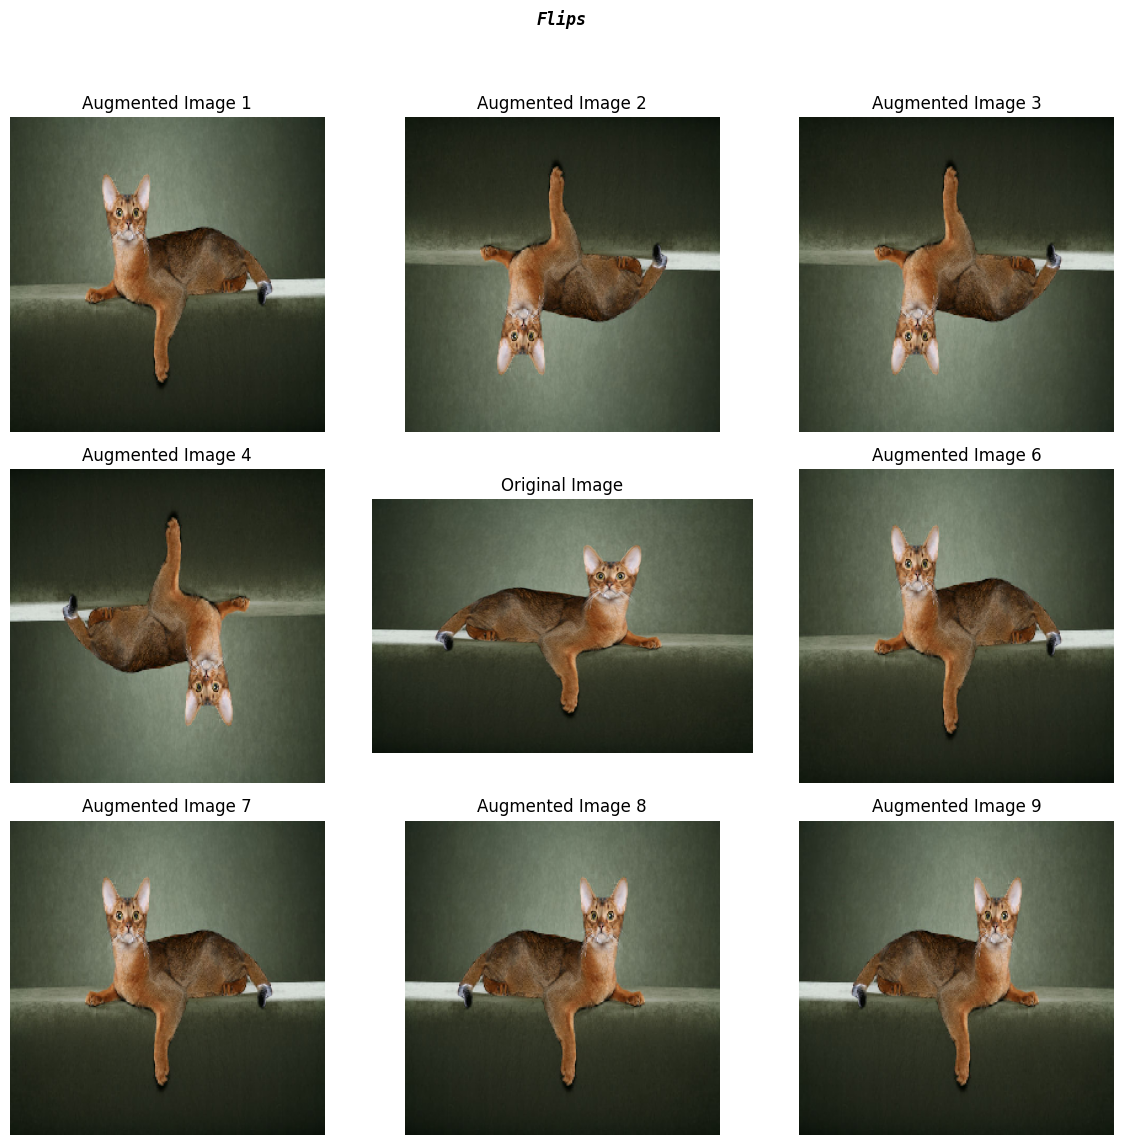

In [27]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    # Your code here
    horizontal_flip = True,
    vertical_flip = True
)
plot_augmented_images(original_image, generator, "Flips")

## Image Augmentation with Keras: Feature Wise Normalization

Normalization is a preprocessing technique that adjusts the pixel values of images to have a specific mean and standard deviation. This can help improve the convergence of the model during training by ensuring that the input data is on a similar scale.

### Normalization Augmentation

The `featurewise_center` and `featurewise_std_normalization` parameters in Keras' `ImageDataGenerator` class enable feature-wise normalization of the dataset. Setting `featurewise_center=True` subtracts the mean from each input feature, while `featurewise_std_normalization=True` divides each input feature by its standard deviation.

Before using these features, it's essential to calculate the mean and standard deviation of the training dataset and then fit the generator to the data using the `fit` method. This allows the generator to apply the correct normalization to each batch of images.

### Application

In the provided example, the CIFAR-10 dataset is loaded, and the mean and standard deviation of the training set are calculated. The `ImageDataGenerator` is then configured with feature-wise normalization enabled and fitted to the training data.

When generating a batch of images, the generator applies the normalization, resulting in images with a mean and standard deviation that are close to the specified values. This can be verified by printing the mean and standard deviation of the augmented images.

### Conclusion

Normalization is a crucial step in preparing data for training deep learning models. By ensuring that the input data has a consistent scale, normalization can help improve the model's training efficiency and overall performance.

In [28]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
x_mean = x_train.mean()
x_std = x_train.std()
x_train_norm = (x_train - x_mean) / x_std
print(x_mean, x_std)

generator = tf.keras.preprocessing.image.ImageDataGenerator(
    # Your code here
    featurewise_center=True,
    featurewise_std_normalization=True,
)

generator.fit(x_train)

x, y = next(generator.flow(x_train, y_train, batch_size=1))
print(x.mean(), x.std(), y)

120.70756512369792 64.1500758911213
-0.45294538 0.65723425 [[3]]


## Image Augmentation with Keras: Samplewise Normalization

Samplewise normalization is a preprocessing technique that adjusts each individual image in a dataset to have a mean of zero and a standard deviation of one. This can help improve the model's performance by ensuring that each input image is on a similar scale.

### Samplewise Normalization Augmentation

The `samplewise_center` and `samplewise_std_normalization` parameters in Keras' `ImageDataGenerator` class enable samplewise normalization. Setting `samplewise_center=True` subtracts the mean of each individual image, while `samplewise_std_normalization=True` divides each image by its standard deviation.

### Application

In the provided example, the `ImageDataGenerator` is configured with samplewise normalization enabled. When generating a batch of images, the generator applies the normalization to each image individually, resulting in images with a mean of approximately zero and a standard deviation of approximately one. This can be verified by printing the mean and standard deviation of the augmented images.

### Conclusion

Samplewise normalization is a valuable preprocessing step for training deep learning models, especially when dealing with images that may have varying brightness or contrast levels. By normalizing each image individually, the model can learn to recognize patterns more effectively, leading to improved performance.

In [29]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    # Your code here
    samplewise_center=True,
    samplewise_std_normalization=True
)

x, y = next(generator.flow(x_train, y_train, batch_size=1))
print(x.mean(), x.std(), y)

0.0 0.99999994 [[7]]


## Image Augmentation with Keras: Rescale and Preprocessing Function

Rescaling and applying a preprocessing function are common techniques used to prepare images for training with deep learning models. Rescaling adjusts the pixel values of images, while a preprocessing function can apply specific transformations required by certain model architectures.

### Rescale and Preprocessing Function Augmentation

The `rescale` parameter in Keras' `ImageDataGenerator` class is used to multiply the pixel values by a specified factor. For example, `rescale=1./255` rescales pixel values to the range [0, 1], which is a common practice for deep learning models.

The `preprocessing_function` parameter allows you to specify a custom function that will be applied to each image. This is useful for applying the specific preprocessing required by pretrained models, such as `tf.keras.applications.mobilenet_v2.preprocess_input`, which preprocesses images for use with the MobileNetV2 model.

### Application

In the provided example, the `ImageDataGenerator` is configured with a rescale factor of 1 (no rescaling) and a preprocessing function for MobileNetV2. When generating a batch of images, the generator applies the preprocessing function to each image. The mean and standard deviation of the augmented images are printed to demonstrate the effect of the preprocessing.

### Conclusion

Rescaling and using a preprocessing function are essential steps in preparing images for training with deep learning models. By adjusting the pixel values and applying model-specific transformations, these techniques help ensure that the input data is in the appropriate format for the model, leading to improved performance.

In [30]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    # Your code here
    rescale=1.,
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input
)
x, y = next(generator.flow(x_train, y_train, batch_size=1))
print(x.mean(), x.std(), y)

-0.32056782 0.27969822 [[4]]


## Augmentation Pipeline and Model Training with Keras

In this example, we create a comprehensive augmentation pipeline using TensorFlow Keras and train a simple convolutional neural network (CNN) model on the CIFAR-10 dataset. The pipeline includes various augmentations to enhance the diversity of the training data, and the model is designed to classify images into 10 categories.

### Augmentation Pipeline

The augmentation pipeline is defined using the `ImageDataGenerator` class and includes the following transformations:

- **Rotation:** Randomly rotates images within a range of 40 degrees.
- **Width and Height Shifts:** Randomly shifts images horizontally and vertically by up to 20% of their width and height, respectively.
- **Shear:** Applies a random shear transformation with an intensity of 20 degrees.
- **Zoom:** Randomly zooms images in and out within a range of [0.5, 1.5].
- **Flips:** Randomly flips images horizontally and vertically.
- **Rescale:** Rescales pixel values to the range [0, 1] by dividing by 255.
- **Preprocessing:** Applies the preprocessing function required by the MobileNetV2 model.

### Model Training

The CIFAR-10 dataset is loaded, and the training data is augmented using the defined pipeline. A simple CNN model is then constructed with the following architecture:

- Two convolutional layers with 32 and 64 filters, respectively, each followed by a max-pooling layer.
- A flattening layer to convert the 2D feature maps into a 1D vector.
- A dense layer with 64 neurons and ReLU activation.
- An output dense layer with 10 neurons (one for each class) and softmax activation.

The model is compiled with the Adam optimizer and trained on the augmented data for 10 epochs. The training and validation accuracy are plotted to visualize the model's performance over time.

### Evaluation and Conclusion

After training, the model is evaluated on the test set, and the test accuracy is printed. The training and validation accuracy plots provide insights into how the model's accuracy evolves over epochs and the impact of augmentation on preventing overfitting.

By leveraging data augmentation, the model is exposed to a more diverse set of training examples, which helps improve its generalization ability and performance on unseen data. This example demonstrates the effectiveness of combining augmentation techniques with a simple CNN architecture for image classification tasks.

In [34]:
# Define the augmentation pipeline
augmentation_pipeline = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=20,
    zoom_range=[0.5, 1.5],
    horizontal_flip=True,
    vertical_flip=True,
    rescale=1./255,
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input
)

In [35]:
# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Prepare the augmented training data generator
train_generator = augmentation_pipeline.flow(x_train, y_train, batch_size=32)

# Define a simple CNN model
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model with the augmented data
history = model.fit(train_generator, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10


/home/fonta42/anaconda3/envs/computer_vision_projects/lib/python3.9/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(
2024-04-05 11:45:48.733966: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-04-05 11:45:48.737609: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2251] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required li

   5/1563 ━━━━━━━━━━━━━━━━━━━━ 22s 15ms/step - accuracy: 0.0900 - loss: 2.3020   

/home/fonta42/anaconda3/envs/computer_vision_projects/lib/python3.9/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 27s 17ms/step - accuracy: 0.1663 - loss: 2.1924 - val_accuracy: 0.1139 - val_loss: 22026.8301
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 27s 17ms/step - accuracy: 0.2249 - loss: 2.0655 - val_accuracy: 0.1095 - val_loss: 16655.1367
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 27s 17ms/step - accuracy: 0.2379 - loss: 2.0377 - val_accuracy: 0.1273 - val_loss: 23068.9805
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 27s 17ms/step - accuracy: 0.2558 - loss: 2.0024 - val_accuracy: 0.1232 - val_loss: 32018.1250
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 27s 17ms/step - accuracy: 0.2717 - loss: 1.9820 - val_accuracy: 0.1055 - val_loss: 42772.2578
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 27s 17ms/step - accuracy: 0.2837 - loss: 1.9550 - val_accuracy: 0.1090 - val_loss: 47208.2930
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 27s 17ms/step - accuracy: 0.2978 - loss: 1.9241 - val_accuracy: 0.1173 - val_loss: 41630.1289
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 27s 17ms/step - a

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1101 - loss: 64485.3086
Test accuracy: 0.10849999636411667


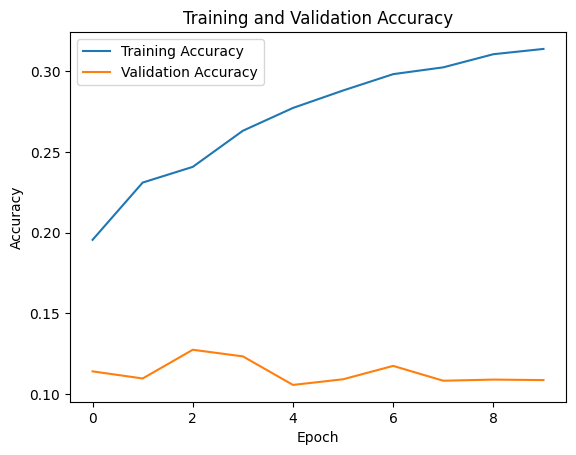

In [36]:
# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc}')

# Plot the training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()